# TRAINING RECURRENT NEURAL NETWORKS

In [ ]:
# !pip install import_ipynb --quiet
# !git clone https://github.com/gmshroff/aml-public.git
# %cd aml-public

In [1]:
import import_ipynb
import utils
import models
from IPython import display
import torch
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import pickle
import numpy as np
import pandas as pd

importing Jupyter notebook from utils.ipynb
importing Jupyter notebook from models.ipynb


In [2]:
from course_data import MyDS, TsDS

importing Jupyter notebook from course_data.ipynb


Financial Time Series

In [3]:
with open('../data/feed_train_ds.pickle','rb') as f: train_ds=pickle.load(f)

In [4]:
with open('../data/feed_test_ds.pickle','rb') as f: test_ds=pickle.load(f)

In [5]:
train_ds.samples[0:5]

[tensor([[[ 0.0000,  1.0485, -1.3291,  ..., -0.5020, -0.5278,  0.8660],
          [ 0.0000,  1.0853, -1.0290,  ..., -0.5020, -0.5278,  0.8660],
          [ 0.0000,  0.3418, -0.7289,  ..., -0.5020, -0.5278,  0.8660],
          ...,
          [ 0.0000,  0.6771,  0.7717,  ..., -0.2257, -0.3105, -1.1514],
          [ 0.0000, -0.7761,  1.0719,  ..., -0.1957,  0.0155, -1.1582],
          [ 0.0000, -1.7888,  1.3720,  ...,  2.4295,  2.4061, -1.1544]]]),
 tensor([[[ 0.0000, -1.3312, -1.4368,  ..., -0.8775, -0.7924,  1.1180],
          [ 0.0000, -0.5145, -1.1832,  ..., -0.8775, -0.7924,  1.1180],
          [ 0.0000,  0.0190, -0.9297,  ..., -0.8775, -0.7924,  1.1180],
          ...,
          [ 0.0000, -0.5892,  0.5916,  ...,  1.1341,  1.7954, -0.8945],
          [ 0.0000, -1.3142,  0.8452,  ...,  1.1900,  1.0414, -0.8945],
          [ 0.0000,  0.8483,  1.8593,  ...,  1.7301,  1.3063, -0.8945]]]),
 tensor([[[ 0.0000,  0.3450, -1.0820,  1.2967,  1.2967,  1.1699,  1.3417,
            0.6335,  0.714

In [10]:
# df_sample=pd.read_csv('~/DataLocal/meta-options/options_sample_df.csv')
df_sample=pd.read_csv('/tmp/option_feed_sample.csv')

In [12]:
df_sample

,Date,Expiry,Strike Price,Settle Price,EXDEL,STRDEL,Close_y,NBreach,Breach,ExInRange,...,Open Int-1,Open Int_OPP-1,PCR-1,Open Int-2,Open Int_OPP-2,PCR-2,Open Int-3,Open Int_OPP-3,PCR-3,ticker
0,03-Oct-2016,06-Oct-2016,22000,0.30,3.0,2410.95,19589.05,0,0,1,...,15080.0,0.0,0.0,15080.0,0.0,0.0,15080.0,0.0,0.0,06-Oct-2016_22000
1,04-Oct-2016,06-Oct-2016,22000,0.05,2.0,2327.30,19672.70,0,0,1,...,15080.0,0.0,0.0,15080.0,0.0,0.0,15080.0,0.0,0.0,06-Oct-2016_22000
2,05-Oct-2016,06-Oct-2016,22000,0.05,1.0,2463.15,19536.85,0,0,1,...,55360.0,0.0,0.0,15080.0,0.0,0.0,15080.0,0.0,0.0,06-Oct-2016_22000
3,06-Oct-2016,06-Oct-2016,22000,0.00,0.0,2604.95,19395.05,0,0,1,...,36480.0,0.0,0.0,55360.0,0.0,0.0,15080.0,0.0,0.0,06-Oct-2016_22000


Recurrent network: LSTM

In [ ]:
net = models.SimpleLSTM(input_size=149,hidden_size=64,output_size=3,lr=1e-3)

In [ ]:
net,losses,accs=models.Train(net,train_ds,epochs=10,verbose=True)

In [ ]:
models.accuracy_variable(net,train_ds)

In [ ]:
models.accuracy_variable(net,test_ds)

In [ ]:
train_ds.samples[0].shape

Siusoidal time series data

In [ ]:
#Generate data - sinusoidal mix
train_ds, test_ds, dloader = utils.sinDataset(n_samples=100,length=20,n_classes=5,batch_size=1)

Recurrent network: RNN

In [ ]:
# Define an RNN to process a sequence; default is 1-D where input can be (batch,seq_vals) else input will need to be given
# with an extra dimension and input will be (batch,seq,features)
net = models.SimpleRNN(input_size=1,hidden_size=32,output_size=5,lr=1e-3)

In [ ]:
# Train the network; note that network is trained in place so repeated calls further train it.
net,losses,accs=models.Train(net,dloader,epochs=50,verbose=True)

Training/Test Accuracies

In [ ]:
s_tr=torch.concat([s.unsqueeze(0).unsqueeze(0) for s in train_ds.samples])
l_tr=torch.concat([l.unsqueeze(0).unsqueeze(0) for l in train_ds.labels])

In [ ]:
newtr=MyDS(s_tr,l_tr)

In [ ]:
models.accuracy_variable(net,newtr)

In [ ]:
s_te=torch.concat([s.unsqueeze(0).unsqueeze(0) for s in test_ds.samples])
l_te=torch.concat([l.unsqueeze(0).unsqueeze(0) for l in test_ds.labels])

In [ ]:
newte=MyDS(s_te,l_te)

In [ ]:
models.accuracy_variable(net,newte)

Recurrent network: LSTM

In [ ]:
net = models.SimpleLSTM(input_size=1,hidden_size=32,output_size=5,lr=1e-3)

In [ ]:
# Train the network; note that network is trained in place so repeated calls further train it.
net,losses,accs=models.Train(net,dloader,epochs=50,verbose=True)

In [ ]:
models.accuracy_variable(net,newtr)

In [ ]:
models.accuracy_variable(net,newte)

Transformer (Encoder) on Financial Time Series

In [ ]:
net = models.Transformer(input_size=149,hidden_size=128,output_size=3,lr=1e-3,num_layers=3)

In [ ]:
net,losses,accs=models.Train(net,train_ds,epochs=10,verbose=True)

In [ ]:
models.accuracy_variable(net,train_ds)

In [ ]:
models.accuracy_variable(net,test_ds)

Transformer (Encoder) on Sinusoidal Time Series

In [ ]:
net = models.Transformer(input_size=1,hidden_size=32,output_size=5,lr=1e-3,num_layers=3)

In [ ]:
s_tr=torch.concat([s.unsqueeze(0).unsqueeze(0) for s in train_ds.samples])
l_tr=torch.concat([l.unsqueeze(0).unsqueeze(0) for l in train_ds.labels])

In [ ]:
newtr=MyDS(s_tr,l_tr)

In [ ]:
net,losses,accs=models.Train(net,newtr,epochs=20,verbose=True)

In [ ]:
models.accuracy_variable(net,newtr)

In [ ]:
s_te=torch.concat([s.unsqueeze(0).unsqueeze(0) for s in test_ds.samples])
l_te=torch.concat([l.unsqueeze(0).unsqueeze(0) for l in test_ds.labels])

In [ ]:
newte=MyDS(s_te,l_te)

In [ ]:
models.accuracy_variable(net,newte)

Sanity check

In [ ]:
correct=0
for s in newte:
    print(s[1].item(), torch.argmax(net(s[0])).numpy())
    if s[1].item()==torch.argmax(net(s[0])): correct+=1

In [ ]:
correct/len(newte)

Plots

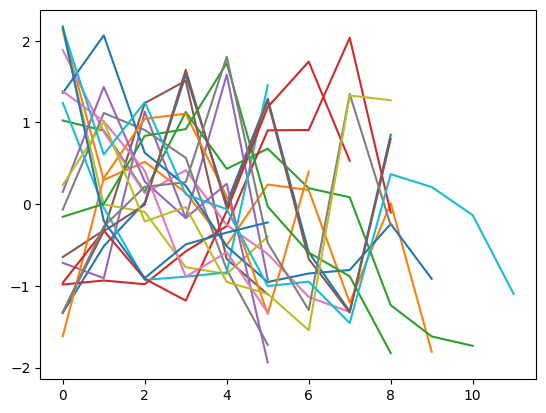

In [9]:
i,N=0,20
for s,l in zip(train_ds.samples,train_ds.labels):
    if l==2: 
        plt.plot(s[0,:,1])
        i+=1
    if i>N: break
plt.show()

In [ ]:
train_ds.samples[20].shape

In [ ]:
for s,l in zip(train_ds.samples,train_ds.labels):
    plt.plot(s)
plt.show()

ICL as GD

In [ ]:
m,n,r=3,4,1
W=torch.randn(r,m,requires_grad=True)
X=torch.randn(m,n,requires_grad=True)
Y=torch.randn(r,n,requires_grad=True)

In [ ]:
L=(1/(2*n))*(W@X-Y)@(W@X-Y).T

In [ ]:
L

In [ ]:
DW=torch.autograd.grad(L,W)[0]

In [ ]:
DW

In [ ]:
Z=torch.concat((X,Y))

In [ ]:
def LSA(Z,WK,WQ,WV,P):
    return Z+P@WV@Z@((WK@Z).T)@(WQ@Z)

In [ ]:
U=torch.concat((torch.concat((torch.eye(m,m),torch.zeros(m,r)),dim=1),torch.zeros(r,m+r)))

In [ ]:
WK,WQ=U,U

In [ ]:
WV=torch.concat((torch.zeros(m,m+r),torch.concat((W,-torch.eye(r,r)),dim=1)))

In [ ]:
P=(1/n)*torch.eye(m+r,m+r)

In [ ]:
Z_new=LSA(Z,WK,WQ,WV,P)

In [ ]:
Z_new

In [ ]:
Y+DW@X

In [ ]:
W_new=W-DW

In [ ]:
W_new

In [ ]:
W

In [ ]:
L_new=L=(1/2*n)*(W_new@X-Y)@(W_new@X-Y).T

In [ ]:
L_new

In [ ]:
Y_new=Z_new[-1,:]

In [ ]:
L_new_hat=(1/2*n)*(W@X-Y_new)@(W@X-Y_new).T

In [ ]:
L_new_hat